In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [33]:
data = pd.read_csv('3.12 Market Segment.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


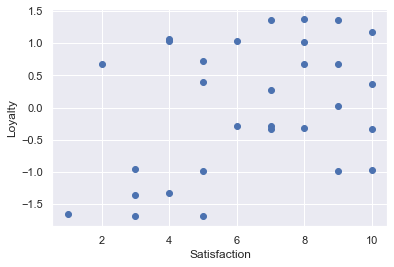

In [4]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Standardize the data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [11]:
scaled_data

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Elbow method

In [14]:
wcss = []

for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(scaled_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.348079410290981,
 4.352037765292863]

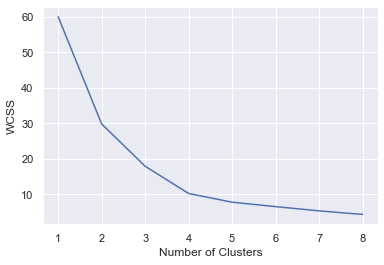

In [18]:
plt.plot(range(1,9),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans_new = KMeans(4)
kmeans_new.fit(scaled_data)

KMeans(n_clusters=4)

In [26]:
clusters_result = kmeans_new.fit_predict(scaled_data)

In [27]:
clusters_result

array([2, 1, 2, 1, 0, 2, 1, 1, 3, 3, 1, 0, 2, 0, 1, 3, 3, 3, 1, 3, 3, 2,
       0, 2, 0, 1, 3, 1, 2, 0])

## We will be deceived , if we use the standarized values of the inputs. So we need to plot the clusters with their original values

In [28]:
data_new = data.copy()
data_new['clusters_result'] = clusters_result
data_new.head()

,Satisfaction,Loyalty,clusters_result
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0


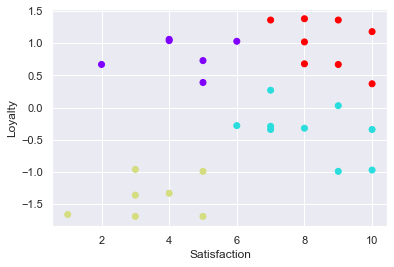

In [32]:
plt.scatter(data_new['Satisfaction'],data_new['Loyalty'],c=data_new['clusters_result'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Purple = Loyal customers (Low satisfied but loyal)
### Reds = Fan customers( Highly satisfied and loyal)
### Skyblue = Roamers ( Highly Satisfied but not loyal)
### Faded_green = Alienated ( Not Satisfied Not Loyal)

## If we increase the Satisfactory- we can convert our LOYAL and ALIENATED into FANS and ROAMERS respectively...
## If we increase the loyalty - we can convert our ALIENATED and ROAMERS into LOYAL and FANS respectively